In [8]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [9]:
import os
import sys
sys.path.insert(0, 'functions/')
from h5_tools import *

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import h5py

**Some settings**

In [4]:
datadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'
h5dir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/'

In [5]:
datafolder = 'ferritin_conc_gly_50_6'
datasetnumber = 5 # 4 # 230 K

In [5]:
# with h5py.File("test.h5", 'a') as f: # w for read/write/create access
    # for col in cols:
    #     f[f'/elog/{col}'] = elog_entries[col].values[0]

# if os.path.isfile("test.h5"):
#     print("true")

In [6]:
# # -- visit function for h5 viewing the structure of files
# def visit_func(name, node):
#     '''
#     Return all groups and datasets name and shapes of h5 file called name
#     '''
#     if isinstance(node, h5py.Group):
#         print("group", node.name)
#     elif isinstance(node, h5py.Dataset):
#         if (node.dtype == 'object') :
#             print (node.name, 'is an object Dataset')
#         else:
#             print('\t', node.name, node.shape)
#     else:
#         print(node.name, 'is an unknown type')

In [6]:
filename = f'{h5dir}{datafolder}_{datasetnumber:04d}.h5'
# if os.path.isfile(filename):
#     print("correct!")

# doesnt really take all the keys and subkeys
keys = []

with h5py.File(filename, 'r') as f:
    for i,key in enumerate(f.keys()):
        for j,subkey in enumerate(f[key].keys()):
             keys.append(f'{key}/{subkey}/')
# xpcs_keys = [k for k in keys if 'xpcs' in k]
# xpcs_keys
keys
    

['elog/Absorbers 100um/',
 'elog/Absorbers 80um/',
 'elog/Exposure time (s)/',
 'elog/LN flow meter/',
 'elog/Mesh (spots x lines)/',
 'elog/No of spots/',
 'elog/Sample/',
 'elog/Sample no. (label)/',
 'elog/Short comment/',
 'elog/Temperature, C/',
 'elog/Temperature, K/',
 'elog/Total exposure time (s)/',
 'elog/comment/',
 'elog/measurement folder/',
 'elog/number of frames/',
 'elog/position y, mm/',
 'elog/position z, mm/',
 'elog/reps per spot/',
 'elog/scan number/',
 'elog/transmission (%)/',
 'saxs/I/',
 'saxs/q/',
 'saxs/scans/',
 'xpcs/g2s/',
 'xpcs/scans/',
 'xpcs/ttcs/']

# plot data

**g2s**

In [55]:
# g2s
qv = load_data(filename, '/xpcs/g2s/q')
dt = load_data(filename, '/xpcs/g2s/delay')
g2s = load_data(filename, 'xpcs/g2s/g2s')
print(np.shape(g2s), np.shape(qv), np.shape(dt))

(320, 12, 80) (12,) (80,)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


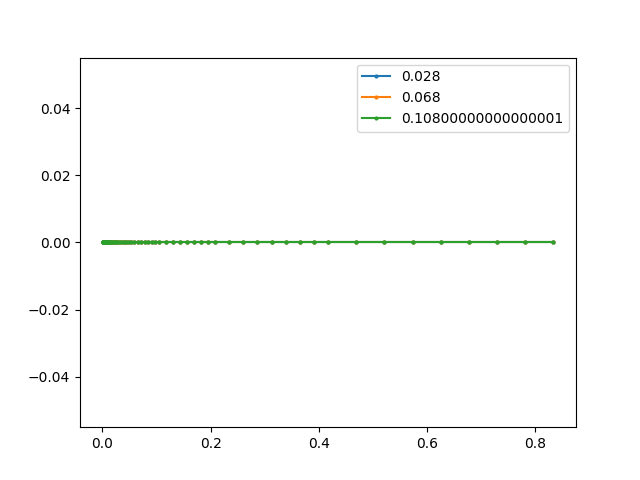

In [59]:
plt.figure()
for i in range(len(qv[:3])):
    plt.plot(dt, np.mean(g2s[:,i,:], axis=0), ls='-', marker='o', ms=2 ,label=qv[i])
    print( np.mean(g2s[:,i,:], axis=0)[:10])
plt.legend()

## TTCs

In [9]:
qv_ttc = load_data(filename, '/xpcs/ttcs/q')
dt_ttc = load_data(filename, '/xpcs/ttcs/times')
ttcs_avg = load_data(filename, '/xpcs/ttcs/ttcs')
ttcs_avg_f = load_data(filename, '/xpcs/ttcs/ttcs_f')
print(np.shape(qv_ttc), np.shape(dt_ttc), np.shape(ttcs_avg), np.shape(ttcs_avg_f))

(11,) (4990,) (11, 4990, 4990) (11, 4990, 4990)


In [10]:
%%time
ttcs = load_data(filename, '/xpcs/ttcs/ttcs_all')
print(np.shape(ttcs))

(320, 11, 4990, 4990)
CPU times: user 58.8 s, sys: 57.6 s, total: 1min 56s
Wall time: 2min


In [12]:
nxpcs = ttcs.shape[0]
nxpcs

320

### Check the filtering, shapes and shit like that

In [ ]:
# lood inside scans
for i, xpcs in enumerate(nxpcs[:10]):
    # loop inside scans
    ttc = ttcs[i]
    ttc_int[i] = np.average(list(tmp['twotime_corf'].values())) # mi sa che sto averagando su tutti i q

In [11]:
# f, ax = plt.subplots(4,4, tight_layout=True)
# np.shape(ax)

# Check raw h5 files

In [9]:
def visit_func(name, node):
    """Return all groups and datasets name and shapes of h5 file called name
    Use it as in the following:
    with h5py.File(filename, 'a') as f: f.visititems(visit_func)
    """
    if isinstance(node, h5py.Group):
        print("group", node.name)
    elif isinstance(node, h5py.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'is an object Dataset')
        else:
            print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')

In [20]:
import numpy as np
import h5py
import hdf5plugin
import os

In [16]:
!ls /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferritin_conc_gly_50_6/ferritin_conc_gly_50_6_0006/scan0037/
# a

eiger1_0000.h5


In [17]:
datadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275'
sample = 'ferritin_conc_gly_50_6'
dataset_n = 3

In [21]:
# !ls /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferritin_conc_gly_50_6/ferritin_conc_gly_50_6_0003/

In [30]:
for scan in range(54,100):
    filename = f'{datadir}/{sample}/{sample}_{dataset_n:04d}/scan{scan:04d}/eiger1_0000.h5'
    # print(os.path.isfile(filename))
    with h5py.File(filename, 'r') as f:
        # f.visititems(visit_func)
        data = f['/entry_0000/ESRF-ID10/eiger1/data/']
    #     data = np.asarray(data)
        print(scan, type(data), np.shape(data), data[0,0,0],"\n" )

54 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

55 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

56 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

57 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

58 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

59 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

60 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

61 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

62 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

63 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

64 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

65 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

66 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

67 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

68 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

69 <class 'h5py._hl.dataset.Dataset'> (5000, 514, 1030) 0 

70 <class 'h5py._hl.dataset.Dataset'> (5